---
#  Hospital Patient Data EDA System 

* From: Minor 1 – Pandas Cleaning.  
* Extension: Clean patient records → visualize department-wise load.   
* Add-ons: Bar charts, box plots, stats summary.   
* Difficulty: Medium".  

---
### **Student Details**
* **Name:** Aadarsh Mishra
* **ERP ID:** 6605983
* **Class Serial No:** 07

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('hospital_data_analysis.csv')
df.head(5)

,Patient_ID,Age,Gender,Condition,Procedure,Cost,Length_of_Stay,Readmission,Outcome,Satisfaction
0,1,45,Female,Heart Disease,Angioplasty,15000,5,No,Recovered,4
1,2,60,Male,Diabetes,Insulin Therapy,2000,3,Yes,Stable,3
2,3,32,Female,Fractured Arm,X-Ray and Splint,500,1,No,Recovered,5
3,4,75,Male,Stroke,CT Scan and Medication,10000,7,Yes,Stable,2
4,5,50,Female,Cancer,Surgery and Chemotherapy,25000,10,No,Recovered,4


In [3]:
print(df.describe())

        Patient_ID         Age          Cost  Length_of_Stay  Satisfaction
count   984.000000  984.000000    984.000000      984.000000    984.000000
mean    500.329268   53.754065   8366.869919       37.663618      3.598577
std     288.979531   14.941135   7762.664640       19.595805      0.883002
min       1.000000   25.000000   -500.000000        1.000000      2.000000
25%     250.750000   45.000000   1000.000000       21.000000      3.000000
50%     500.500000   55.000000   6000.000000       38.000000      4.000000
75%     750.250000   65.000000  15000.000000       54.250000      4.000000
max    1000.000000   78.000000  25000.000000       76.000000      5.000000


---
# Data cleaning

In [4]:
df = df[(df['Cost'] >= 0) & (df['Length_of_Stay'] >= 0)]
df.drop_duplicates(inplace=True)
df.isnull().sum()

Patient_ID        0
Age               0
Gender            0
Condition         0
Procedure         0
Cost              0
Length_of_Stay    0
Readmission       0
Outcome           0
Satisfaction      0
dtype: int64

### Data cleaned

---
# Adding department

In [5]:
condition_to_dept = {
    'Heart Disease': 'Cardiology', 'Heart Attack': 'Cardiology', 'Hypertension': 'Cardiology',
    'Fractured Arm': 'Orthopedics', 'Fractured Leg': 'Orthopedics', 'Osteoarthritis': 'Orthopedics',
    'Stroke': 'Neurology',
    'Cancer': 'Oncology', 'Prostate Cancer': 'Oncology',
    'Appendicitis': 'General Surgery',
    'Diabetes': 'Endocrinology',
    'Allergic Reaction': 'Emergency',
    'Respiratory Infection': 'Pulmonology',
    'Childbirth': 'Maternity',
    'Kidney Stones': 'Urology'
}

df['Department'] = df['Condition'].map(condition_to_dept)

In [6]:
print("Data Cleaned & Departments Assigned.")
print(df[['Condition', 'Department']].head())

Data Cleaned & Departments Assigned.
       Condition     Department
0  Heart Disease     Cardiology
1       Diabetes  Endocrinology
2  Fractured Arm    Orthopedics
3         Stroke      Neurology
4         Cancer       Oncology


---
# summary.

In [7]:
dept_summary = df.groupby('Department')[['Length_of_Stay', 'Cost']].mean()
dept_summary['Patient_Count'] = df['Department'].value_counts()
dept_summary = dept_summary.sort_values('Patient_Count', ascending=False)

In [8]:
print("Department-Wise Stats:")
print(dept_summary)

Department-Wise Stats:
                 Length_of_Stay          Cost  Patient_Count
Department                                                  
Cardiology            38.257576  11348.484848            198
Orthopedics           37.040609   2487.309645            197
Oncology              42.122137  22519.083969            131
General Surgery       37.439394   8000.000000             66
Neurology             40.333333  10000.000000             66
Emergency             34.661538    100.000000             65
Endocrinology         36.092308   2000.000000             65
Maternity             35.523077  12000.000000             65
Pulmonology           34.661538    800.000000             65
Urology               36.461538   6000.000000             65


---
# Department-wise load using pie chart

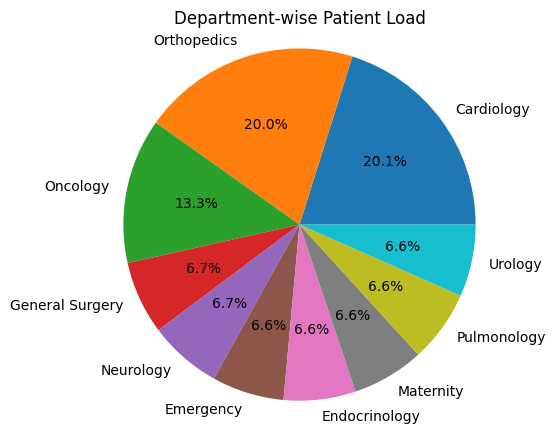

In [9]:
plt.figure(figsize=(5,5)) 
plt.pie(dept_summary['Patient_Count'], labels=dept_summary.index, autopct='%1.1f%%')
plt.title('Department-wise Patient Load')
plt.axis('equal') 
plt.show()

---
# Box plots for Duration of stay

/var/folders/6d/r5rvrw8d2dddzmj0np4y1c_h0000gn/T/ipykernel_7678/1151930512.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Department', y='Length_of_Stay', palette='Set2')


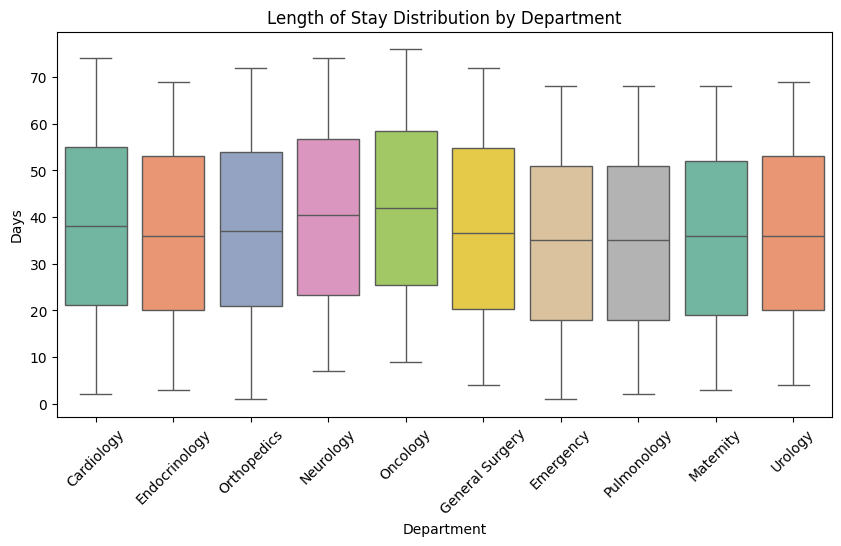

In [10]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='Department', y='Length_of_Stay', palette='Set2')
plt.title('Length of Stay Distribution by Department')
plt.xticks(rotation=45)
plt.ylabel('Days')
plt.show()

---
# Bar chart of avarage Cost

/var/folders/6d/r5rvrw8d2dddzmj0np4y1c_h0000gn/T/ipykernel_7678/4213146898.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_cost.values, y=avg_cost.index, palette='magma')


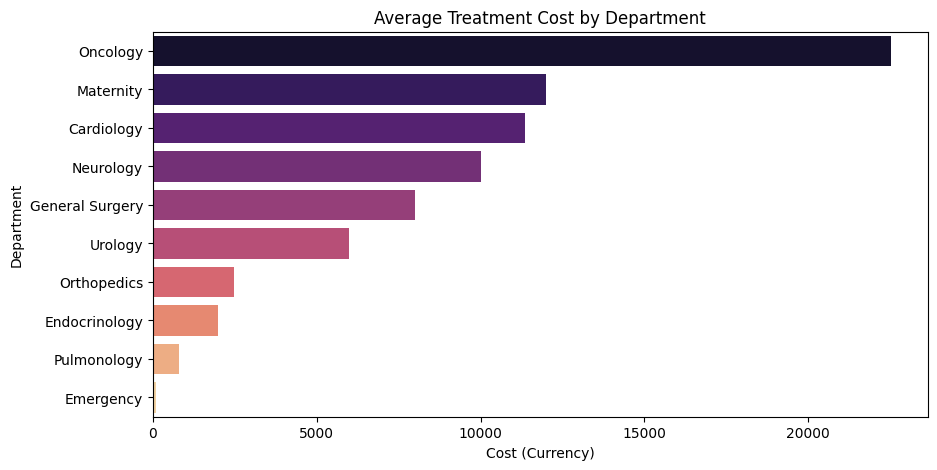

In [ ]:
avg_cost = df.groupby('Department')['Cost'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=avg_cost.values, y=avg_cost.index, palette='magma')
plt.title('Average Treatment Cost by Department')
plt.xlabel('Cost (Currency)')
plt.show()

---